<a href="https://colab.research.google.com/github/bragind/ML/blob/main/logregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

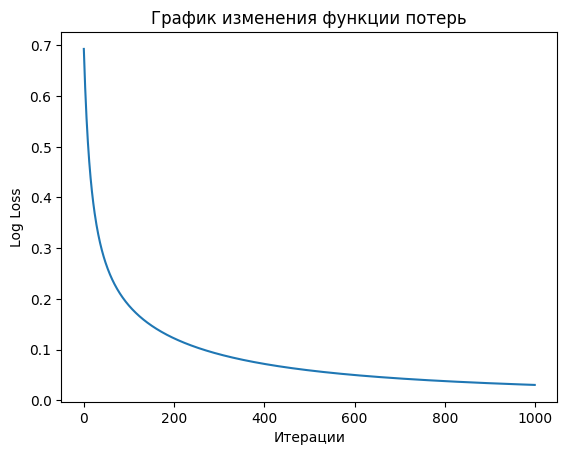

Точность модели: 1.00
Оптимизированные веса: [-2.1550189   4.01701624  2.10877537]


'\n1. Размер шага (eta) влияет на скорость и устойчивость сходимости. Слишком большой шаг может вызвать колебания или расходимость, слишком маленький — замедлить обучение.\n\n2. Малое количество итераций может не дать модели сойтись, а слишком большое — привести к избыточным вычислениям без улучшения.\n\n3. Логистическая регрессия предсказывает вероятность класса через сигмоиду, которая подходит для бинарной классификации. Для многоклассовой используются методы вроде softmax.\n'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

def sigmoid(z):
    # Устойчивая реализация сигмоиды
    return np.where(z >= 0,
                    1 / (1 + np.exp(-z)),
                    np.exp(z) / (1 + np.exp(z)))

def log_loss(w, X, y):
    N = X.shape[0]
    z = X @ w
    pred = sigmoid(z)
    epsilon = 1e-15  # Чтобы избежать log(0)
    pred = np.clip(pred, epsilon, 1 - epsilon)  # Ограничиваем значения
    loss = - (1 / N) * np.sum(y * np.log(pred) + (1 - y) * np.log(1 - pred))
    grad = (1 / N) * X.T @ (pred - y)
    return loss, grad

def optimize(w, X, y, n_iterations=1000, eta=0.1):
    losses = []
    for _ in range(n_iterations):
        loss, grad = log_loss(w, X, y)
        w -= eta * grad
        losses.append(loss)
    return w, losses

def predict(w, X, b=0.5):
    probabilities = sigmoid(X @ w)
    y_predicted = (probabilities >= b).astype(int)
    return y_predicted

# Генерация данных
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)
X = np.hstack([X, np.ones((X.shape[0], 1))])  # Добавляем свободный член
w_initial = np.zeros(X.shape[1])

# Обучение модели
w_optimized, losses = optimize(w_initial, X, y, n_iterations=1000, eta=0.1)

# Предсказание и оценка
y_pred = predict(w_optimized, X)
accuracy = accuracy_score(y, y_pred)

# Визуализация
plt.plot(losses)
plt.xlabel('Итерации')
plt.ylabel('Log Loss')
plt.title('График изменения функции потерь')
plt.show()

print(f"Точность модели: {accuracy:.2f}")
print("Оптимизированные веса:", w_optimized)

# Ответы на дополнительные вопросы
"""
1. Размер шага (eta) влияет на скорость и устойчивость сходимости. Слишком большой шаг может вызвать колебания или расходимость, слишком маленький — замедлить обучение.

2. Малое количество итераций может не дать модели сойтись, а слишком большое — привести к избыточным вычислениям без улучшения.

3. Логистическая регрессия предсказывает вероятность класса через сигмоиду, которая подходит для бинарной классификации. Для многоклассовой используются методы вроде softmax.
"""